In [1]:
import pandas as pd 
import numpy as pn
import matplotlib.pyplot as plt

In [11]:
data= pd.read_csv('synthetic_data.csv')

In [12]:
data.head()

,Timestamp,CPU_Temperature,CPU_Usage,CPU_Load,Memory_Usage,Battery_Level,CPU_Power
0,2024-11-26 21:57:26.133647,62.950139,53.832004,1.523134,34.008361,59.177568,70.283701
1,2024-11-26 21:57:26.133647,61.420126,14.385447,1.108812,57.516739,69.016107,5.120486
2,2024-11-26 21:57:26.133647,68.319537,49.044007,0.107341,35.948501,93.612413,31.967159
3,2024-11-26 21:57:26.133647,55.366177,75.712571,1.384443,70.448822,82.903646,19.735311
4,2024-11-26 21:57:26.133647,53.069673,63.468386,0.750949,39.415481,98.450226,49.012966


In [6]:
df.shape

(10000000, 7)

In [7]:
df.reset_index(drop=True, inplace=True) 
df.index.name ='Index'

In [8]:
df.head()

,Timestamp,CPU_Temperature,CPU_Usage,CPU_Load,Memory_Usage,Battery_Level,CPU_Power
Index,,,,,,,
0,2024-11-26 21:57:26.133647,62.950139,53.832004,1.523134,34.008361,59.177568,70.283701
1,2024-11-26 21:57:26.133647,61.420126,14.385447,1.108812,57.516739,69.016107,5.120486
2,2024-11-26 21:57:26.133647,68.319537,49.044007,0.107341,35.948501,93.612413,31.967159
3,2024-11-26 21:57:26.133647,55.366177,75.712571,1.384443,70.448822,82.903646,19.735311
4,2024-11-26 21:57:26.133647,53.069673,63.468386,0.750949,39.415481,98.450226,49.012966


In [9]:
df.sample()

,Timestamp,CPU_Temperature,CPU_Usage,CPU_Load,Memory_Usage,Battery_Level,CPU_Power
Index,,,,,,,
1931794,2024-11-26 21:57:31.147474,98.176682,29.458524,0.208045,98.845467,72.438837,6.245714


In [13]:
from scipy.stats import zscore

# Calculate z-scores for each column
data['Temp_Zscore'] = zscore(data['CPU_Temperature'])
data['Usage_Zscore'] = zscore(data['CPU_Usage'])
data['Memory_Zscore'] = zscore(data['Memory_Usage'])

# Detect anomalies (z-score > 3 or < -3)
data['Anomaly_Detected'] = (data['Temp_Zscore'].abs() > 3) | \
                           (data['Usage_Zscore'].abs() > 3) | \
                           (data['Memory_Zscore'].abs() > 3)


C:\Users\Sanket Satpute\AppData\Local\Temp\ipykernel_17528\500210478.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
E:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


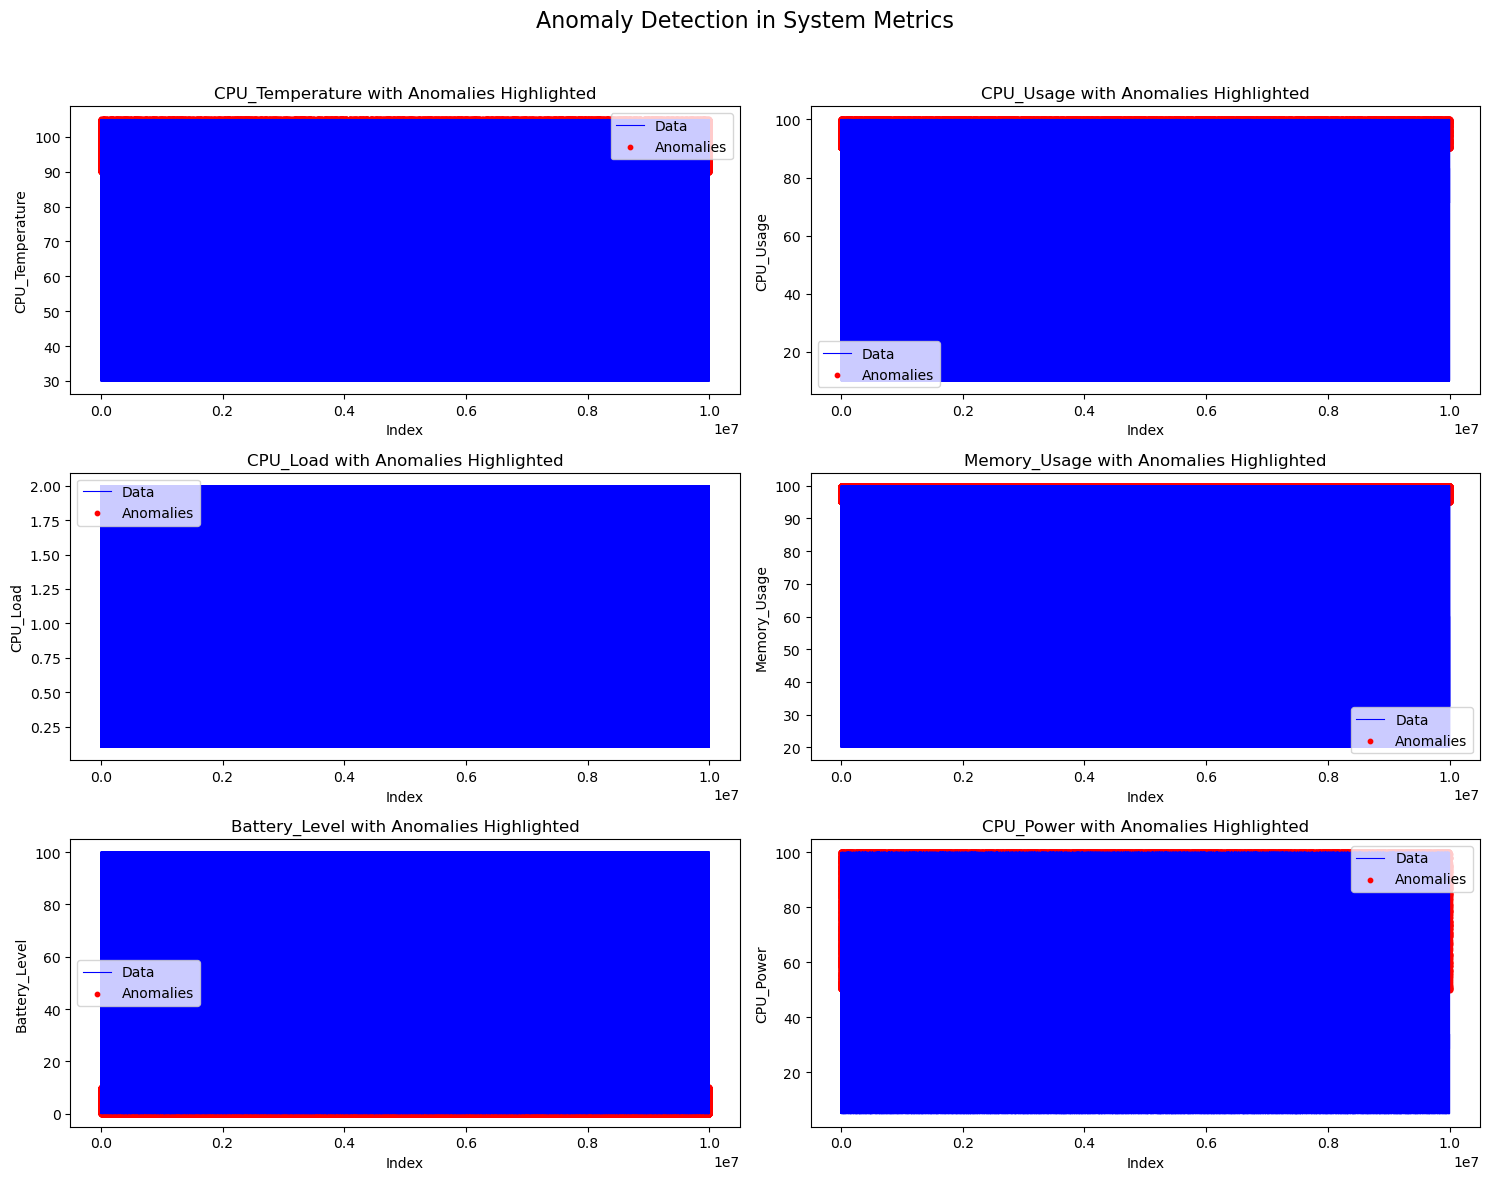

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the synthetic data
data = pd.read_csv('synthetic_data.csv')

# Define anomaly detection logic (e.g., simple thresholding)
anomalies = {
    'CPU_Temperature': data['CPU_Temperature'] > 90,
    'CPU_Usage': data['CPU_Usage'] > 90,
    'CPU_Load': data['CPU_Load'] > 2,
    'Memory_Usage': data['Memory_Usage'] > 90,
    'Battery_Level': data['Battery_Level'] < 10,
    'CPU_Power': data['CPU_Power'] > 50,
}

# Function to plot data with anomalies
def plot_with_anomalies(data, column, anomaly_mask, ax):
    ax.plot(data.index, data[column], label='Data', color='blue', linewidth=0.8)
    ax.scatter(
        data.index[anomaly_mask],
        data[column][anomaly_mask],
        color='red',
        label='Anomalies',
        s=10
    )
    ax.set_title(f'{column} with Anomalies Highlighted')
    ax.set_xlabel('Index')
    ax.set_ylabel(column)
    ax.legend()

# Create subplots for all metrics
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Anomaly Detection in System Metrics', fontsize=16)

columns = ['CPU_Temperature', 'CPU_Usage', 'CPU_Load', 'Memory_Usage', 'Battery_Level', 'CPU_Power']
axes = axes.flatten()

# Plot each metric
for i, column in enumerate(columns):
    plot_with_anomalies(data, column, anomalies[column], axes[i])

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
